# Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
import stanfordnlp
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

C:\Users\PANCHAYAT  SAMITI 01\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Reading the data
data = pd.read_csv("final_data_3809.csv")
data = data.iloc[:,1:]
data

,Review,Summary
0,It's my first time to use iOS phone and I am l...,Highly recommended
1,It’s a must buy who is looking for an upgrade ...,Perfect product!
2,Value for money❤️❤️Its awesome mobile phone in...,Perfect product!
3,"Smooth like butter, camera like fantabulous, s...",Worth every penny
4,It is just awesome mobile for this price from ...,Perfect product!
...,...,...
3804,Good product,Product review
3805,Okey,Notbad
3806,AWESOME IOS CAMERA ALSO ALMOST REACHED PIXEL.,Awesome ios
3807,Good Phone with face unlocking,Great phone


- We have 2 columns, the review and its summary.
- The summary can be used to cross check whether the summarizations we made are sensible or not.

# Basic Feature Extraction:

We will be extracting some basic features from the reviews which are as follows:
- Number of characters.
- Number of words.
- Number of unique words.
- Count of stopwords.
- Average word length.
- Ratio of unique words to total words in a review.
- Ratio of number of stop words to total words in a review.

In [3]:
def character_count(text):
    """
    This function returns the number of letters in a review
    
    """
    return len(text)

def word_count(text):
    """
    This function returns the number of words in a review
    
    """
    return len(text.split())

def unique_words(text):
    """
    This function returns the number of unique words in a review
    
    """
    return len(set(text.split()))

def stopwords_count(text):
    """
    This function returns the number of stop words present in a review
    
    """
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

In [4]:
# Example for above defined functions:

text = data["Review"].values[5]
print("Review :",text)
print("="*100)

s1 = character_count(text)
s2 = word_count(text)
s3 = unique_words(text)
s4 = stopwords_count(text)

print("Number of characters :",s1)
print("Number of words :",s2)
print("Number of unique words :",s3)
print("Number of stopwords :",s4)
print("Average length of word in review :",(s1//s2))
print("Ratio of unique words to total words :",(s3/s2))
print("Ratio of stop words to total words :",(s4/s2))

Review : Iphone is just awesome.. battery backup is very very nice.. continuously for 10 hours we can use it.camera is just awesome.. display is just fab.i love it alot..i had to wait 15 days for it as i pre ordered it..overalll it's worth the price..these all images are clicked by my iPhone..and i love it.
Number of characters : 299
Number of words : 54
Number of unique words : 43
Number of stopwords : 31
Average length of word in review : 5
Ratio of unique words to total words : 0.7962962962962963
Ratio of stop words to total words : 0.5740740740740741


In [5]:
# Adding these features to dataset:

data['char_count'] = data["Review"].apply(lambda x:character_count(x))
data['word_count'] = data["Review"].apply(lambda x:word_count(x))
data['unique_word_count'] = data["Review"].apply(lambda x:unique_words(x))
data['stopword_count'] = data["Review"].apply(lambda x:stopwords_count(x))

data['avg_wordlength'] = data['char_count']/data['word_count']
data['unique_vs_words'] = data['unique_word_count']/data['word_count']
data['stopwords_vs_words'] = data['stopword_count']/data['word_count']

In [6]:
data

,Review,Summary,char_count,word_count,unique_word_count,stopword_count,avg_wordlength,unique_vs_words,stopwords_vs_words
0,It's my first time to use iOS phone and I am l...,Highly recommended,460,91,65,44,5.054945,0.714286,0.483516
1,It’s a must buy who is looking for an upgrade ...,Perfect product!,500,98,75,45,5.102041,0.765306,0.459184
2,Value for money❤️❤️Its awesome mobile phone in...,Perfect product!,211,38,34,16,5.552632,0.894737,0.421053
3,"Smooth like butter, camera like fantabulous, s...",Worth every penny,203,37,34,13,5.486486,0.918919,0.351351
4,It is just awesome mobile for this price from ...,Perfect product!,473,85,71,26,5.564706,0.835294,0.305882
...,...,...,...,...,...,...,...,...,...
3804,Good product,Product review,12,2,2,0,6.000000,1.000000,0.000000
3805,Okey,Notbad,4,1,1,0,4.000000,1.000000,0.000000
3806,AWESOME IOS CAMERA ALSO ALMOST REACHED PIXEL.,Awesome ios,45,7,7,0,6.428571,1.000000,0.000000
3807,Good Phone with face unlocking,Great phone,30,5,5,1,6.000000,1.000000,0.200000


# Data Cleaning:

In [7]:
# Downloading some of the packages needed for cleaning the data.

nltk.download('wordnet')
nltk.download('stopwords')
#stanfordnlp.download('en')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
lemma = WordNetLemmatizer()
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\PANCHAYAT  SAMITI
[nltk_data]     01\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\PANCHAYAT
[nltk_data]     SAMITI 01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\PANCHAYAT  SAMITI
[nltk_data]     01\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
def de_emojify(text):
    """
    This function removes the emoji's from the reviews
    
    """
    regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE)
    return regex_pattern.sub(r'', text)

# Reference---> (https://thewebdev.info/2022/04/16/how-to-remove-emojis-from-a-string-in-python/)

In [9]:
# This code consists of thorough cleaning of the reviews:

all_stopwords = stopwords.words('english') # this list consists of all the stopwords present in the english language

# Removing the following words from list containing stopwords to preserve meaning of some reviews
all_stopwords.remove('not')
all_stopwords.remove('but')
all_stopwords.remove('because')
all_stopwords.remove('against')
all_stopwords.remove('between')
all_stopwords.remove('up')
all_stopwords.remove('down')
all_stopwords.remove('in')
all_stopwords.remove('out')
all_stopwords.remove('once')
all_stopwords.remove('before')
all_stopwords.remove('after')
all_stopwords.remove('few')
all_stopwords.remove('more')
all_stopwords.remove('most')
all_stopwords.remove('no')
all_stopwords.remove('nor')
all_stopwords.remove('same')
all_stopwords.remove('some')
all_stopwords.remove('only')

def remove_stopwords(texts):
    '''
    This function removes stopwords, punctuations, emoji's from the sentences and applies lemmatization to the words
    Lemmatization returns the dictionary form of words
    We also expand the contractions and some remaining emoji's with the help of regex
    
    '''
    sent = texts.lower().strip() # converting to lowercase
    sent = re.sub('[^a-zA-Z]',' ',sent) # returning the reviews which are free from numeric digits and characters other than letters
    
    # replacing some specific characters with appropriate strings
    sent = sent.replace("′", "'").replace("’", "'").replace("...."," ").replace("..."," ").replace(".."," ")\
                           .replace("❤"," ").replace("❤️"," ").replace("*♥️♥️"," ").replace("10x","10 times")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("*****"," ")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("doesn't", "does not")
    
    sentence = de_emojify(sent) # getting rid of the emoji's
    sentence = re.sub(r'[^\w\s]'," ",sentence) # replacing the string which is not a word with an empty string, this ensures complete removal of emoji's
    sentence = sentence.split() # splitting the reviews to get words in each review
    
    # applying lemmatization and returning only those words which are not present in the stopwords list
    final1 = [lemma.lemmatize(word) for word in sentence if not word in set(all_stopwords)] 
    final1_ = ' '.join(final1) # joining the words to finally get the reviews
    return final1_  

In [10]:
# Not removing stopwords

def clean_aspect_spacy(reviews):
    """
    This function removes punctuations and other non alpha numeric characters but 
    it does not remove stopwords. We keep the stopwords as it is.
    This will be helpful to us in later part of data cleaning
    
    """
    statement = reviews.lower().strip()
    statement = statement.replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("*****"," ")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("doesn't", "does not")
    statement = de_emojify(statement)
    statement = re.sub(r'[^\w\s]'," ",statement)
    statement = statement.split() 
    final_statement = [lemma.lemmatize(word) for word in statement]
    final_statement_ = ' '.join(final_statement)
    return final_statement_  

In [11]:
# Applying the above function and storing the cleaned reviews (**with stopwords**) in the below list

clean_review_withstopwords = []
for z in tqdm(data['Review'].values):
    res = clean_aspect_spacy(z)
    clean_review_withstopwords.append(res)

100%|█████████████████████████████████████████████████████████████████████████████| 3809/3809 [00:06<00:00, 629.60it/s]


# Before and after data cleaning of reviews:

- Below we can see 3 examples of reviews and understand what type of data cleaning has been applied on them.

In [12]:
data['Review'].values[12]

'Looking so good 👍 😍  super 👌 stylish 😎 phone   Clean box 📦  good 👍 delivery 👌  fast delivery  Original box Original  iphone 📱  👌 😍😍😍'

In [13]:
x1 = remove_stopwords(data['Review'].values[12])
x1

'looking good super stylish phone clean box good delivery fast delivery original box original iphone'

In [14]:
x2 = data['Review'].values[10]
x2

'Totally in love with this ❤ the camera quality is amazing just love it 😘😘😘 itsss dammnnnnnn amazing...  Must buy iPhone 11 this is my best experience ever ☀👌👌🧡🧡🧡🧡🧡 thanku apple ❤'

In [15]:
x21 = remove_stopwords(data['Review'].values[10])
x21

'totally in love camera quality amazing love it dammnnnnnn amazing must buy iphone best experience ever thanku apple'

In [16]:
x3 = data['Review'].values[115]
x3

'🤩🤩🤩🤩🤩🤩I loved the Phone..  Every time I pick up the phone it makes me happy... The phone is beast💪💪 and the camera is fabulous 🥰🥰🥰.. I think one of my great purchase from Flipkart.. Thank you Filpkart..'

In [17]:
x31 = remove_stopwords(data['Review'].values[115])
x31

'loved phone every time pick up phone make happy phone beast camera fabulous think one great purchase flipkart thank filpkart'

In [18]:
"""
The following code applies the previously defined function and cleans the reviews (**removing stopwords**) and returns the list.

"""
#clean_review = []
#for z in tqdm(data['Review'].values):
    #res = remove_stopwords(z)
    #clean_review.append(res)

'\nThe following code applies the previously defined function and cleans the reviews (**removing stopwords**) and returns the list.\n\n'

In [19]:
def correct_spelling(sentence):
    """
    Given a review, this function corrects the spelling mistake if any and returns reviews with no spelling errors
    It uses the [Textblob] library to perform the operation
    
    """
    sentence = TextBlob(sentence)
    result = sentence.correct()
    return result

In [20]:
#correct_spell = []
#for k in tqdm(clean_review):
    #correct_spell.append(correct_spelling(k))
#print("Spelling Correction done, number of sentences :",len(correct_spell))

In [21]:
#correct_reviews = [str(x) for x in correct_spell]

In [22]:
#len(correct_reviews)

In [23]:
#import pickle

#with open('correct_spelling_3809', 'wb') as fp:
    #pickle.dump(correct_reviews, fp)

- Above list of sentences are cleaned,lemmatized and have correct spelling. We dump the list so we won't have to again do the above processes for cleaning
- Name of file containing this: (correct_spelling_3809)

In [24]:
# Loading the file with cleaned reviews: 

import pickle
with open("correct_spelling_3809","rb") as fp:
    correct_reviews = pickle.load(fp)
    

# Feature Extraction:

- We will be coming up with aspects for each review. The aspects help us to understand about what "feature" of the product the customer is talking about.
- For aspect detection, the following methods have been employed:
----------------------------------------------------------------------------------------------------------------------------------------------------------
- **1) Latent Dirichlet Allocation(LDA) with Bag of Words.**
- **2) Latent Dirichlet Allocation(LDA) with TFIDF.**
- **3) Non matrix Factorization.**
- **4) Using Spacy library for detecting aspects and description of the product.**
----------------------------------------------------------------------------------------------------------------------------------------------------------
- Reason behind using various techniques is to see which works better for aspect detection of our product and could be fine tuned later for better results.


# 1) LDA for aspect detection: BOW

In [25]:
# We use the genism library here. So, importing the neccessary files:

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(42)

In [26]:
def lemmatize_stemming(text):
    """
    This function does the lemmatization operation on the input text given
    We have done the lemmatization already, so anyway there is no harm in doing it again.
    
    """
    return (lemma.lemmatize(text, pos='v'))

def preprocess(text):
    """
    This function returns words in token forms and the word which have less than 3 characters are removed
    
    """
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Reference---> (https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

In [27]:
# This list consists of list of tokenized words for each review
tokens = [preprocess(words) for words in correct_reviews] 

In [28]:
# Below we see the tokenized words obtained for the 1st review:
tokens[0]

['time',
 'phone',
 'love',
 'degradation',
 'love',
 'color',
 'love',
 'assebility',
 'phone',
 'need',
 'learn',
 'functionality',
 'see',
 'easy',
 'function',
 'work',
 'specially',
 'content',
 'writer',
 'longer',
 'content',
 'creation',
 'platform',
 'amaze',
 'phone',
 'good',
 'quality',
 'photography',
 'task']

- Words which are only nouns and verbs are kept and other tokenized words are removed.
- This trick improves the LDA model slightly.

In [29]:
def only_noun_verbs(i):
    """
    This function takes list of tokenized words and returns only those words which are either (noun) or (verb)
    
    """
    join_words = ' '.join(tokens[i])
    doc = nlp(join_words)
    main_words = []
    for token in doc:
        if token.pos_ == 'NOUN' or token.pos_ == 'VERB':
            main_words.append(str(token))
    return main_words
    

In [30]:
nlp = spacy.load("en_core_web_sm")

In [31]:
# Removing the words which are neither (noun) nor (verb):
tokens_ = [only_noun_verbs(i) for i in range(len(tokens))]

In [32]:
dictionary = gensim.corpora.Dictionary(tokens_) # we form a dictionary with the above list of words ("tokens_")
dictionary.filter_extremes(no_below=50, no_above=0.5, keep_n=100)

# no_below = Tokens which have appeared in less than 50 reviews are removed
# no_above = Tokens which have appeared in more than half of the reviews are removed. These are the common words which should be removed.
# keep_n = After applying the above two functions, we are storing only the first 100 words in the dictionary

In [33]:
print("After applying the filters, we are left with [{}] words.".format(len(dictionary.keys())))

After applying the filters, we are left with [100] words.


- Fine tune the above parameters for getting better results with LDA model.

In [34]:
# For each review we are creating a list containing tuples, where each tuple represents the tokenized word
# First value of the tuple is the index of word and second value is the number of times that word is repeated in that particular review.
# As Bag of words returns the number of occurence of a word, we use that in the below line of code.

bow_corpus = [dictionary.doc2bow(doc) for doc in tokens_]

In [35]:
print(bow_corpus[280])  #(word with index [24] is repeated [2] time)

[(2, 1), (5, 1), (6, 1), (7, 1), (25, 1), (26, 2), (56, 1)]


In [36]:
# Below is an example showing what the list created above represents:

bow_doc_280 = bow_corpus[280]
for i in range(len(bow_doc_280)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_280[i][0], 
                                               dictionary[bow_doc_280[i][0]],bow_doc_280[i][1]))

Word 2 ("love") appears 1 time.
Word 5 ("time") appears 1 time.
Word 6 ("work") appears 1 time.
Word 7 ("camera") appears 1 time.
Word 25 ("apple") appears 1 time.
Word 26 ("battery") appears 2 time.
Word 56 ("product") appears 1 time.


**[(2, 1), (5, 1), (6, 1), (7, 1), (25, 1), (26, 2), (56, 1)]**

In [37]:
# Running LDA using Bag of Words

lda_model_bow = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=4, workers=2)

# Reference---> (https://radimrehurek.com/gensim/models/ldamulticore.html)

- num_topics = 5. We will be taking 5 aspects through which the product can be described.
- passes = 4. This parameter can be tuned to get better results, after many trials it was found that this value (4) gave the most sensible results compared to any other topic words we got with different values for (passes)
- We can also fine tune the model later by additionally tuning the values for (eta) and (decay)
- Reference for tuning of parameters : (https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc)

In [38]:
# Below we see the topics and their corresponding words, we now have to manually label the topic names based on what sort of words are defined. 

for idx, topic in lda_model_bow.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.129*"charge" + 0.055*"camera" + 0.053*"quality" + 0.040*"heat" + 0.031*"problem" + 0.031*"issue" + 0.029*"battery" + 0.026*"time" + 0.024*"display" + 0.022*"come"
Topic: 1 
Words: 0.123*"camera" + 0.092*"battery" + 0.051*"quality" + 0.047*"life" + 0.030*"performance" + 0.030*"apple" + 0.029*"amaze" + 0.028*"love" + 0.026*"product" + 0.023*"charge"
Topic: 2 
Words: 0.151*"product" + 0.053*"price" + 0.035*"apple" + 0.034*"experience" + 0.032*"money" + 0.031*"amazon" + 0.026*"think" + 0.024*"display" + 0.022*"value" + 0.021*"camera"
Topic: 3 
Words: 0.051*"product" + 0.046*"apple" + 0.036*"time" + 0.034*"amazon" + 0.033*"buy" + 0.029*"screen" + 0.028*"experience" + 0.028*"seller" + 0.028*"receive" + 0.027*"purchase"
Topic: 4 
Words: 0.083*"battery" + 0.052*"performance" + 0.042*"work" + 0.039*"issue" + 0.038*"face" + 0.035*"product" + 0.034*"camera" + 0.032*"month" + 0.032*"display" + 0.029*"quality"


- After going through the words, we will be alloting the following aspect names to the (5) topic names defined above:
----------------------------------------------------------------------------------------------------------------------------
- Topic 0: **battery**
- Topic 1: **camera**
- Topic 2: **price**
- Topic 3: **performance**
- Topic 4: **display**
------------------------------------------------------------------------------------------------------------------------------------
- Why did we choose these names for the topics?? 
- Answer =  We used the TF-IDF feature names and got the most frequent words. See the below code snippet for this!

# Using TFIDF for important frequent words:

In [39]:
tfidf_vectorizer = TfidfVectorizer(min_df=40, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(correct_reviews)

def get_tfidf_top_features(n_top=30):
    """
    This function returns the top (n) important features by first sorting the tfidf values
    and then fetching their respective indices. Through these indices we get the feature names
    
    """
    importance = np.argsort(np.asarray(tfidf.sum(axis=0)).ravel())[::-1]
    tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names())
    return tfidf_feature_names[importance[:n_top]]

In [40]:
tfidf_features = tfidf_vectorizer.get_feature_names()

In [41]:
imp_words = get_tfidf_top_features(n_top=30)
print(imp_words)  

['phone' 'good' 'product' 'camera' 'battery' 'apple' 'best' 'amazon'
 'awesome' 'quality' 'great' 'buy' 'performance' 'charge' 'nice' 'day'
 'issue' 'amazing' 'life' 'price' 'got' 'display' 'andros' 'money' 'time'
 'like' 'using' 'mobile' 'better' 'experience']


In [42]:
x1 = list(imp_words)
x2 = ' '.join(x1)
x2

'phone good product camera battery apple best amazon awesome quality great buy performance charge nice day issue amazing life price got display andros money time like using mobile better experience'

In [43]:
# getting only the nouns, as aspects are mostly nouns:

doc = nlp(x2)
descriptive_term = []
for token in doc:
    if token.pos_ == 'NOUN':
        descriptive_term.append(token)
        
print(descriptive_term)

[phone, product, camera, battery, apple, quality, buy, performance, charge, day, issue, life, price, display, andros, money, time, experience]


From the above we can pick sensible features such as **(camera, battery, performance, display, price)**
- 1) **camera** = This aspect considers all parameters of a camera such as (wide lens, shutter speed, pro mode, fps) which people have talked about.
- 2) **battery** = This considers words like (issues, heating, charge, standby time).
- 3) **performance** = If people are talking about overall working or internals such as (ram, storage, processor, sound) we use this aspect.
- 4) **display** = This aspect has reviews which talk about (screen, touchability, refresh rate, asthetics, color)
- 5) **price** = This aspect is used if review talks about (value for money, product is worth or not, discounts, sale, accessories) 

# 2) LDA using TFIDF:

In [44]:
# Here, we use the TFIDF corpus and see if we get any better results than BOW lDA model:

from gensim import corpora, models

tfidf_lda = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf_lda[bow_corpus]

In [45]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=10, workers=2)

In [46]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.051*"display" + 0.045*"experience" + 0.041*"camera" + 0.038*"andros" + 0.036*"battery" + 0.036*"user" + 0.033*"amaze" + 0.029*"quality" + 0.026*"thing" + 0.026*"life"
Topic: 1 
Words: 0.063*"issue" + 0.062*"heat" + 0.051*"camera" + 0.050*"work" + 0.049*"charge" + 0.041*"face" + 0.035*"screen" + 0.035*"battery" + 0.027*"month" + 0.024*"good"
Topic: 2 
Words: 0.064*"product" + 0.058*"receive" + 0.048*"thank" + 0.046*"quality" + 0.046*"delivery" + 0.041*"purchase" + 0.041*"amazon" + 0.034*"pack" + 0.032*"apple" + 0.029*"time"
Topic: 3 
Words: 0.066*"performance" + 0.064*"price" + 0.044*"amazon" + 0.036*"buy" + 0.035*"upgrade" + 0.031*"product" + 0.030*"camera" + 0.028*"deliver" + 0.028*"feel" + 0.028*"expect"
Topic: 4 
Words: 0.116*"product" + 0.110*"love" + 0.103*"money" + 0.073*"value" + 0.070*"charge" + 0.065*"battery" + 0.031*"apple" + 0.030*"camera" + 0.029*"life" + 0.022*"deal"


- After going through the words, we will be alloting the following aspect names to the (5) topic names defined above:
----------------------------------------------------------------------------------------------------------------------------------------------------------
- Topic 0: **display**
- Topic 1: **price**
- Topic 2: **camera**
- Topic 3: **battery**
- Topic 4: **performance**

In [47]:
# To see which topic does a given review belong to, or in other words what aspect can describe the review of the product
# We can use the following code to know that:

# Reference---> (https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc)
lda_model_tfidf[corpus_tfidf[280]]

[(0, 0.057136673),
 (1, 0.06471879),
 (2, 0.058420144),
 (3, 0.057696767),
 (4, 0.7620276)]

- We see that **[topic 4]** has highest value associated with it **(0.76205)**. This basically tells us that the review (280) is 76% about the [topic 4].
- Therefore, we will be alloting the review with the topic number which has the highest value.

In [48]:
def get_topic_tfidf(i):
    """
    This function takes the topics, its corresponding floating values and determines the highest value and 
    returns the corresponding topic number
    This function is for the LDA model with TFIDF
    
    """
    dict_ = dict(lda_model_tfidf[corpus_tfidf[i]]) # create a dictionary with key: topic number, value: probability value
    prob_values = np.round(np.array(list(dict_.values())),4) # rounding off the probability values because by using the (np.max) function the values 
                                                             # are rounded off and we don't get the exact value to fetch the key.
        
    max_prob = np.max(prob_values) # getting the max value
    
    for key,value in zip(list(dict_.keys()),prob_values): 
        if max_prob == value: # if the max value is equal to the values (in dictionary) during iteration then return the key
            return key
            break
            
def get_topic_bow(i):
    """
    This function is for the LDA model with BOW
    
    """
    dict_ = dict(lda_model_bow[bow_corpus[i]])
    prob_values = np.round(np.array(list(dict_.values())),4)
    max_prob = np.max(prob_values)
    
    for key,value in zip(list(dict_.keys()),prob_values):
        if max_prob == value:
            return key
            break

In [49]:
# This code gives us the topic number for each review, we get this by iteratinf through each review and applying the above defined function

LDA_topic_tfidf = []  # this list has the topic numbers for the LDA model with TFIDF
for idx in range(len(correct_reviews)):
    result = get_topic_tfidf(idx)
    LDA_topic_tfidf.append(result)

LDA_topic_bow = []  # this list has the topic numbers for the LDA model with BOW
for idx in range(len(correct_reviews)):
    result = get_topic_bow(idx)
    LDA_topic_bow.append(result)


# 3) Non matrix Factorization:

The following reference proved useful to understand how to use NMF for getting topic names:

_https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20is,of%20descriptive%20statistics%20and%20visualizations_

In [50]:
from sklearn.decomposition import NMF

In [51]:
def display_topics(model, feature_names, no_top_words):
    """
    This function helps us to display words which belong to a specific topic
    
    """
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [52]:
no_top_words = 25
nmf = NMF(n_components=5, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_features, no_top_words)

# The above parameters can be tuned to get better results
# Reference---> (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html)

Topic 0:
phone best great andros buy love using amazon price time experience like year apple got user nice upgrade use money amazing review bought new old
Topic 1:
good overall quality camera price mobile experience phone ok packing compare quite looking look delivery little high performance pretty touch flipkart compared battery image available
Topic 2:
product amazon apple delivery received nice got genuine buy happy original thanks service working day delivered seller great flipkart packing time thank issue customer price
Topic 3:
camera battery quality life performance charge display best day great issue better amazing apple face superb andros excellent fast screen mobile use like charging money
Topic 4:
awesome loved word camera phone look performance really experience colour mobile quality thanks night feature simply smooth picture build clock guy image touch delivery wide


- Topic 0 : **price**
- Topic 1 : **camera**
- Topic 2 : **performance**
- Topic 3 : **battery**
- Topic 4 : **display**

In [53]:
nmf_topic_values = nmf.transform(tfidf)
topic_values = nmf_topic_values.argmax(axis=1) # this returns the topic numbers for each review

In [54]:
topic_values

array([0, 3, 0, ..., 4, 1, 3], dtype=int64)

# 4) Spacy library for aspect detection:

In [55]:
# Without stopwords:

aspects = []
for sentence in correct_reviews:
    doc = nlp(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            prepend = ''
            for child in token.children:
                if child.pos_ != 'ADV':
                    continue
                prepend += child.text + ' '
            descriptive_term = prepend + token.text
    aspects.append({'aspect': target,'description': descriptive_term})
    
# Reference---. (https://towardsdatascience.com/aspect-based-sentiment-analysis-using-spacy-textblob-4c8de3e0d2b9)

In [56]:
print(aspects[50:70])

[{'aspect': 'deal', 'description': 'nice'}, {'aspect': '', 'description': 'best'}, {'aspect': '', 'description': 'new'}, {'aspect': '', 'description': 'full'}, {'aspect': 'colour', 'description': 'overall'}, {'aspect': 'thing', 'description': 'waterproof'}, {'aspect': 'charging', 'description': 'front'}, {'aspect': 'life', 'description': 'great'}, {'aspect': 'dream', 'description': 'second'}, {'aspect': 'performance', 'description': 'good'}, {'aspect': 'neck', 'description': 'most important'}, {'aspect': 'battery', 'description': 'perfect'}, {'aspect': 'display', 'description': 'ironic'}, {'aspect': 'product', 'description': 'great'}, {'aspect': 'deal', 'description': 'fast'}, {'aspect': '', 'description': 'overall'}, {'aspect': '', 'description': 'really impressive'}, {'aspect': 'phone', 'description': 'better'}, {'aspect': 'blast', 'description': 'pretty good'}, {'aspect': 'person', 'description': 'better'}]


- The aspects and their respective description captured are not that good.


In [57]:
# With stopwords:

aspects_stopwords = []
for sentence in clean_review_withstopwords:
    doc = nlp(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            prepend = ''
            for child in token.children:
                if child.pos_ != 'ADV':
                    continue
                prepend += child.text + ' '
            descriptive_term = prepend + token.text
    aspects_stopwords.append({'aspect': target,'description': descriptive_term})

In [58]:
print(aspects_stopwords[50:70])

[{'aspect': 'flipkart', 'description': 'nice'}, {'aspect': 'phone', 'description': 'best'}, {'aspect': 'camera', 'description': 'very fast'}, {'aspect': 'earphone', 'description': 'full'}, {'aspect': '', 'description': 'extra'}, {'aspect': 'apple', 'description': 'waterproof'}, {'aspect': 'camera', 'description': 'of oldish'}, {'aspect': 'life', 'description': 'great'}, {'aspect': '', 'description': 'second'}, {'aspect': '', 'description': 'good'}, {'aspect': 'camera', 'description': 'most important'}, {'aspect': '', 'description': 'perfect'}, {'aspect': 'chipthat', 'description': 'differ'}, {'aspect': 'product', 'description': 'best'}, {'aspect': '', 'description': 'fast'}, {'aspect': 'budget', 'description': 'low'}, {'aspect': '', 'description': 'really impressive'}, {'aspect': 'mini', 'description': 'better'}, {'aspect': 'phone', 'description': 'pretty good'}, {'aspect': 'phone', 'description': 'better'}]


- By keeping the stopwords we get some sensible aspects and corresponding descriptions than the above method (removing stopwords)
- Still this spacy library gives poor results so we won't rely on this for aspect detection.

# Polarity:

In [59]:
# Vader sentiment analysis:
def sentiment_scores(sentence):
    senti = SentimentIntensityAnalyzer() 
    sentiment_dict = senti.polarity_scores(sentence) # this line returns the polarity for sentence
  
    if sentiment_dict['compound'] >= 0.05 : # if the compound score is >= 0.05 then the review is positive
        return ("Positive"),sentiment_dict['pos'],sentiment_dict['compound']

    elif sentiment_dict['compound'] <= - 0.05 : # if the compound score is <= -0.05 then the review is negative
        return ("Negative"),sentiment_dict['neg'],sentiment_dict['compound']

    else :
        return ("Neutral"),sentiment_dict['neu'],sentiment_dict['compound'] # if compound score is in between 0.05 and -0.05 then the review is neutral
    
# Reference---> (https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/)

In [60]:
# An example for polarity score:

idx_ = 504 # change the index value here to know the polarity of the review
senti = SentimentIntensityAnalyzer()
print("Review :",clean_review_withstopwords[idx_])
print("="*100)
print("Polarity values :",senti.polarity_scores(clean_review_withstopwords[idx_]))
print("="*100)
if senti.polarity_scores(clean_review_withstopwords[idx_])['compound'] >= 0.05:
    print("Review is positive")
elif senti.polarity_scores(clean_review_withstopwords[idx_])['compound'] <= - 0.05:
    print("Review is negative")
else:
    print("Review is neutral")

Review : one of the worst device i never used it like a iron box full heat
Polarity values : {'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'compound': -0.7359}
Review is negative


In [61]:
sentiment_ = [] # this list carries the sentiment for the review
pol_value = [] # this list consists of  the polarity for the review
compound = []

for u in clean_review_withstopwords: # applying the above defined function by iterating through each review
    a,b,c = sentiment_scores(u)
    sentiment_.append(a)
    pol_value.append(b)
    compound.append(c)

About compound score: 
- The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, the higher the positivity of the text.

# Creating the dataframe:

- We will be making 3 dataframes based on the methods employed for aspect detection. Hence, we have the following dataframes for:
- 1) LDA model with BOW **(iphone_data_bow)**
- 2) LDA model with TFIDF **(iphone_data_tfidf)**
- 3) Non Matrix Factorization **(iphone_data_nmf)**
- During the modeling phase we will see which dataframe gives us best performance.

# iphone_data_bow

In [62]:
iphone_bow = {"review" : correct_reviews, "aspects" : LDA_topic_bow, "sentiment" : sentiment_ , "polarity" : pol_value, 'score': compound }
iphone_data_bow = pd.DataFrame(iphone_bow)

# below we replace the topic name with aspect name as we previously decided
iphone_data_bow["aspects"] = iphone_data_bow["aspects"].replace([0,1,2,3,4],["battery","camera","price","performance","display"])

iphone_data_bow['char_count'] = data['char_count']
iphone_data_bow['word_count'] = data['word_count']
iphone_data_bow['unique_word_count'] = data['unique_word_count']
iphone_data_bow['stopword_count'] = data['stopword_count']
iphone_data_bow['avg_wordlength'] = data['avg_wordlength']
iphone_data_bow['unique_vs_words'] = data['unique_vs_words']
iphone_data_bow['stopwords_vs_words'] = data['stopwords_vs_words']

In [63]:
iphone_data_bow

,review,aspects,sentiment,polarity,score,char_count,word_count,unique_word_count,stopword_count,avg_wordlength,unique_vs_words,stopwords_vs_words
0,first time use to phone loving degradation lov...,camera,Positive,0.209,0.9649,460,91,65,44,5.054945,0.714286,0.483516
1,must buy looking upgrade previous generation p...,camera,Positive,0.152,0.9506,500,98,75,45,5.102041,0.765306,0.459184
2,value money awesome mobile phone in world disp...,price,Positive,0.400,0.9709,211,38,34,16,5.552632,0.894737,0.421053
3,smooth like butter camera like fantabulous sou...,camera,Positive,0.446,0.9648,203,37,34,13,5.486486,0.918919,0.351351
4,awesome mobile price apple after day review ba...,camera,Positive,0.210,0.9682,473,85,71,26,5.564706,0.835294,0.305882
...,...,...,...,...,...,...,...,...,...,...,...,...
3804,good product,price,Positive,0.744,0.4404,12,2,2,0,6.000000,1.000000,0.000000
3805,obey,battery,Neutral,1.000,0.0000,4,1,1,0,4.000000,1.000000,0.000000
3806,awesome to camera also almost reached fixed,camera,Positive,0.510,0.6378,45,7,7,0,6.428571,1.000000,0.000000
3807,good phone face unlocking,display,Positive,0.420,0.4404,30,5,5,1,6.000000,1.000000,0.200000


- polarity : This tells us how much is the intensity of a review. If a review is positive, then is it mildly positive or highly positive.
- score : This can be used for classifying sentiments:
- a) score >= 0.05 : **positive**
- b) score <= -0.05 : **negative**
- c) -0.05 <= score <= 0.05 : **neutral**

# iphone_data_tfidf

In [64]:
iphone_tfidf = {"review" : correct_reviews, "aspects" : LDA_topic_tfidf, "sentiment" : sentiment_ , "polarity" : pol_value , 'score': compound }
iphone_data_tfidf = pd.DataFrame(iphone_tfidf)
iphone_data_tfidf["aspects"] = iphone_data_tfidf["aspects"].replace([0,1,2,3,4],["display","price","camera","battery","performance"])

iphone_data_tfidf['char_count'] = data['char_count']
iphone_data_tfidf['word_count'] = data['word_count']
iphone_data_tfidf['unique_word_count'] = data['unique_word_count']
iphone_data_tfidf['stopword_count'] = data['stopword_count']
iphone_data_tfidf['avg_wordlength'] = data['avg_wordlength']
iphone_data_tfidf['unique_vs_words'] = data['unique_vs_words']
iphone_data_tfidf['stopwords_vs_words'] = data['stopwords_vs_words']

In [65]:
iphone_data_tfidf.head(2)

,review,aspects,sentiment,polarity,score,char_count,word_count,unique_word_count,stopword_count,avg_wordlength,unique_vs_words,stopwords_vs_words
0,first time use to phone loving degradation lov...,performance,Positive,0.209,0.9649,460,91,65,44,5.054945,0.714286,0.483516
1,must buy looking upgrade previous generation p...,battery,Positive,0.152,0.9506,500,98,75,45,5.102041,0.765306,0.459184


# iphone_data_nmf

In [66]:
iphone_nmf = {"review" : correct_reviews, "aspects": topic_values, "sentiment" : sentiment_ , "polarity" : pol_value, 'score': compound }
iphone_data_nmf = pd.DataFrame(iphone_nmf)

In [67]:
nmf_remap = {0: 'price', 1: 'camera', 2: 'performance', 3: 'battery', 4: 'display'}

iphone_data_nmf['aspects'] = iphone_data_nmf['aspects'].map(nmf_remap)

iphone_data_nmf['char_count'] = data['char_count']
iphone_data_nmf['word_count'] = data['word_count']
iphone_data_nmf['unique_word_count'] = data['unique_word_count']
iphone_data_nmf['stopword_count'] = data['stopword_count']
iphone_data_nmf['avg_wordlength'] = data['avg_wordlength']
iphone_data_nmf['unique_vs_words'] = data['unique_vs_words']
iphone_data_nmf['stopwords_vs_words'] = data['stopwords_vs_words']

In [68]:
iphone_data_nmf.head(2)

,review,aspects,sentiment,polarity,score,char_count,word_count,unique_word_count,stopword_count,avg_wordlength,unique_vs_words,stopwords_vs_words
0,first time use to phone loving degradation lov...,price,Positive,0.209,0.9649,460,91,65,44,5.054945,0.714286,0.483516
1,must buy looking upgrade previous generation p...,battery,Positive,0.152,0.9506,500,98,75,45,5.102041,0.765306,0.459184


# Data visualisation: (BOW - LDA Model)

- For the LDA topics we are using the BOW model to do the data visualisations because the topics obtained for this model makes much more sense than the TFIDF model.

# Pie Chart: Aspects

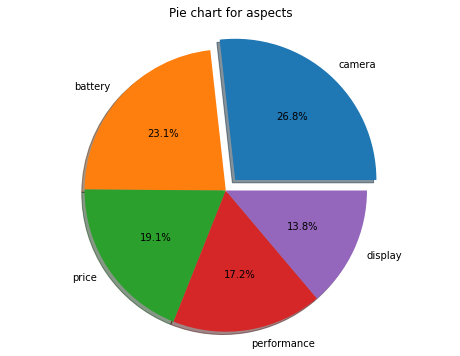

In [69]:
# Code for pie-chart:
x1 = dict(iphone_data_bow['aspects'].value_counts())
aspect = [] 
for x in x1.keys():
    aspect.append(x)
count = [] 
for y in x1.values():
    count.append(y)
    
labels = aspect
sizes = count
explode = (0.1,0,0,0,0)  # explode 1st slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Pie chart for aspects')
plt.show()

- We see that mostly people have talked about **camera** and **battery** of our iphone 11 product, followed by **price**, **performance** and **display**

# Pie Chart: Sentiment

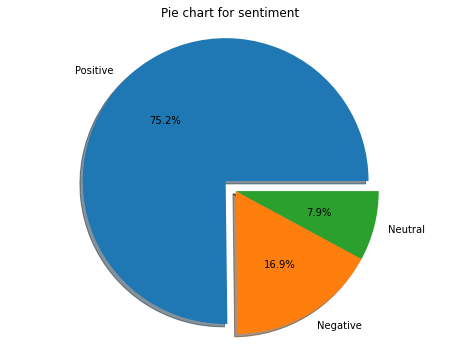

In [70]:
# Code for pie-chart:
x2 = dict(iphone_data_bow['sentiment'].value_counts())
sentiment = [] 
for x in x2.keys():
    sentiment.append(x)
count = [] 
for y in x2.values():
    count.append(y)
    
labels = sentiment
sizes = count
explode = (0.1,0,0)  # explode 1st slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Pie chart for sentiment')
plt.show()

- Nearly **75%** of the people have a **positive feedback** towards our feature, **17%** maybe had **some issue** with the product and a mere **8%** had **neutral view**.
- It is an imbalanced dataset.

# Distribution: Polarity

<AxesSubplot:title={'center':'Distribution of polarity'}, xlabel='score', ylabel='Density'>

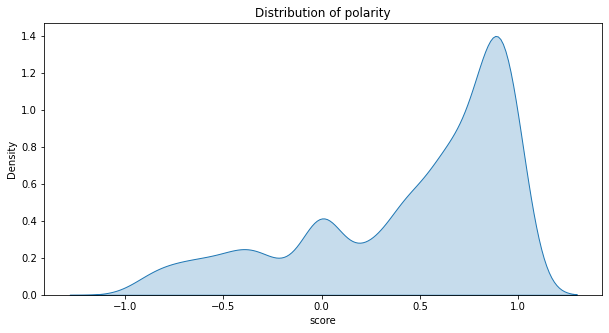

In [71]:
plt.figure(figsize=(10, 5))
plt.title("Distribution of polarity")
sns.kdeplot(iphone_data_bow["score"],shade=True)

- The plot above has a _left skewed_ distribution.
- We see that very few people criticize our product whereas large number of them have positive view.
- There is another segment of people who are okay with overall performance of the product. Thus, slight increase in curve for score = 0.

# Relation between sentiment and aspects:

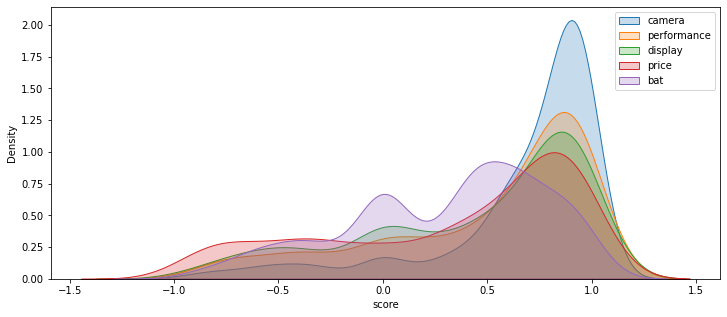

In [72]:
x1 = iphone_data_bow.groupby(by = "aspects")
cam = x1.get_group("camera")
per = x1.get_group("performance")
dis = x1.get_group("display")
price = x1.get_group("price")
bat = x1.get_group("battery")

plt.figure(figsize=(12, 5))
sns.kdeplot(cam["score"],shade=True, label = 'camera',legend = True)
sns.kdeplot(per["score"],shade=True, label = 'performance',legend = True)
sns.kdeplot(dis["score"],shade=True, label = 'display',legend = True)
sns.kdeplot(price["score"],shade=True, label = 'price',legend = True)
sns.kdeplot(bat["score"],shade=True, label = 'bat',legend = True)
plt.legend()

- We see that **camera and performance** have more positive reviews than other aspects.
- **Price** has some negative sentiment attached to it.

# Wordcloud: Sentiments

In [73]:
pos = iphone_data_bow.loc[iphone_data_bow["sentiment"] == "Positive"] # this contains all rows having positive sentiment
neg = iphone_data_bow.loc[iphone_data_bow["sentiment"] == "Negative"] # this contains all rows having negative sentiment
neu = iphone_data_bow.loc[iphone_data_bow["sentiment"] == "Neutral"] # this contains all rows having neutral sentiment

In [74]:
# What if we could represent words in the shape of iphone 11!!
# We download a picture of the iphone's backside and add the mask attribute in the wordcloud generation

iphone_11 = np.array(Image.open("black_mask.webp")) # converting the image into an array

In [75]:
# Word Cloud for Duplicate question:
stop_words = set(stopwords.words("english")) # to remove the stopwords

def wordcloud(data,text):
    
    """
    This function generates the wordcloud by first getting indiviudal words from every reviews
    
    """
    words = ''
    for j in (data): # This loop extracts words from sentences given to it as input
        c = (str(j).split())
        for v in c:
            b = v.lower()
            words += "".join(b)+" "
    
    plt.figure(figsize=(30, 7))
    wc_q = WordCloud(width = 800, height = 800,background_color ='white', mask = iphone_11, stopwords = stop_words,min_font_size = 10)
    wc_q.generate(words)
    print(text)
    plt.imshow(wc_q, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

In [76]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Word cloud for positive sentiments


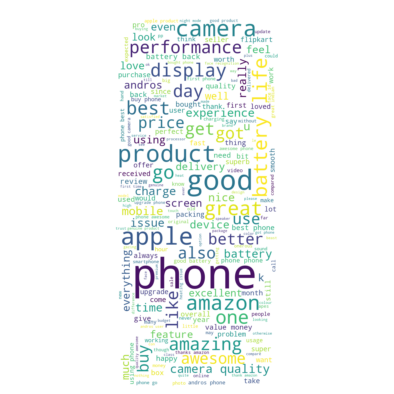

In [77]:
pos_data = pos["review"].values
pos_text = "Word cloud for positive sentiments"
wordcloud(pos_data,pos_text)

- The above wordcloud shows the *frequent words* used by people who gave **positive reviews** for the product.
- The words highlighted here are **(awesome, best, super, loved, smooth, perfect, better, happy, good)**.


Word cloud for negative sentiments


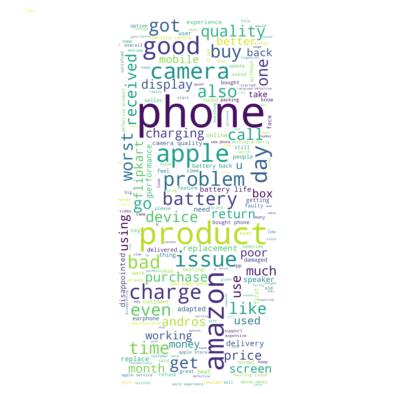

In [78]:
neg_data = neg["review"].values
neg_text = "Word cloud for negative sentiments"
wordcloud(neg_data,neg_text)

- The above wordcloud shows the *frequent words* used by people who gave **negative reviews** for the product.
- The words highlighted here are **(issue, problem, worst, bad, waste, return, money back)**.



Word cloud for neutral sentiments


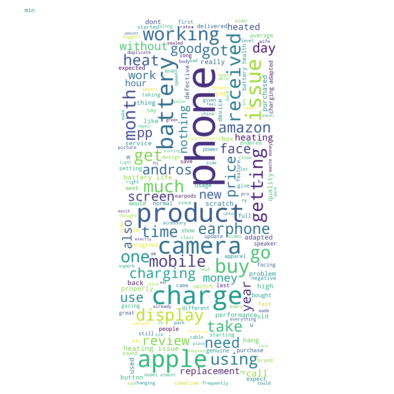

In [79]:
neu_data = neu["review"].values
neu_text = "Word cloud for neutral sentiments"
wordcloud(neu_data,neu_text)

- The above wordcloud shows the *frequent words* used by people who had **neutral view** towards our product.



# Distributions: Basic features extracted

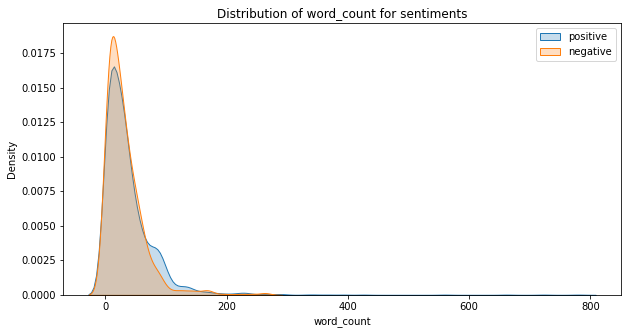

In [80]:
# Word Count:

plt.figure(figsize=(10, 5))
plt.title("Distribution of word_count for sentiments")
sns.kdeplot(data = pos['word_count'],shade=True, label = "positive", legend = True)
sns.kdeplot(data = neg['word_count'],shade=True, label = "negative", legend = True)
plt.legend()

- We observe that there is a high overlap and we can't make a clear distinction whether a review would be _positive_ or _negative_ based on this feature **(count of words)**.
- Also, the distribution looks like log normal. Most of the reviews consists of 30-40 words. 

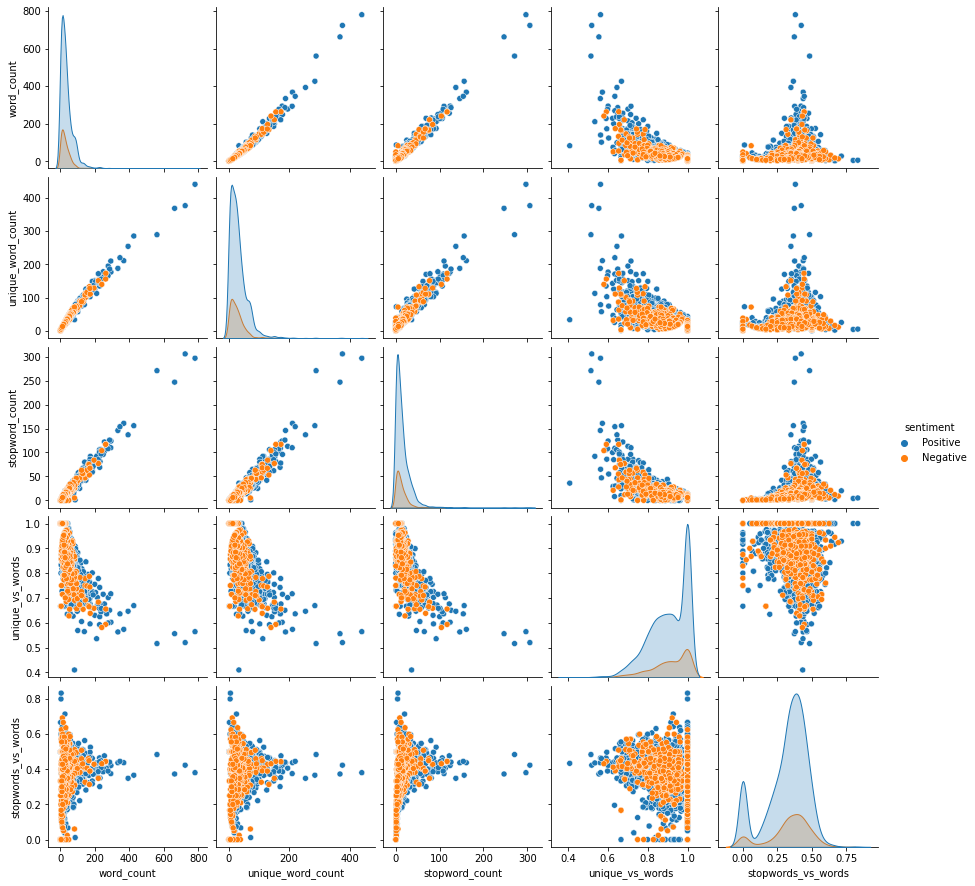

In [81]:
# pairplots:

only_pos_neg = pd.concat([pos,neg],axis=0,ignore_index=True) # combining dataframes consisting of positive & negative sentiments
n = len(only_pos_neg)

sns.pairplot(only_pos_neg[['word_count', 'unique_word_count', 'stopword_count', 'unique_vs_words', 'stopwords_vs_words', 'sentiment']][0:n], hue='sentiment', vars=['word_count', 'unique_word_count', 'stopword_count', 'unique_vs_words', 'stopwords_vs_words'])
plt.show()

# vars:list of variable names
# Variables within data to use, otherwise use every column with a numeric datatype.

- In the above combination of pairplots we see major overlap for every feature.
- There is log-normal distribution for **word_count, unique_word_count and stopword_count**.

# Bar plot: Polarity

In [82]:
def count(data,group_name,text,text2,sub_group):
    """
    This function draws a horizontal bar plot to know which aspects have how many positive, negative or neutral sentiments.
    
    """
    
    dict_version = {} # this dictionary has key: aspect, value: mean of positive/negative/neutral score
    form_group = data.groupby(by = (group_name)) # group by aspects
    for i in list(dict(data['aspects'].value_counts()).keys()): # this loop runs for each aspect
        get_aspect = form_group.get_group(i) # getting that particular aspect to perform mean operation on its (polarity) column
        result = get_aspect[sub_group].count() # calculating the count of the sentiment for that particular aspect
        dict_version[i] = result # adding this aspect and corresponding mean value to the defined dictionary.
    
    # the following lines of code simply draw the bar plot
    plt.figure(figsize=(10, 5))
    x_ver = list(dict_version.keys())
    y_ver = list(dict_version.values())
    plt.barh(x_ver,y_ver)
    plt.xlabel(text2, fontsize = 16)
    plt.ylabel("Aspects", fontsize = 16)
    plt.title(text,fontsize = 16)
    return plt.show() 

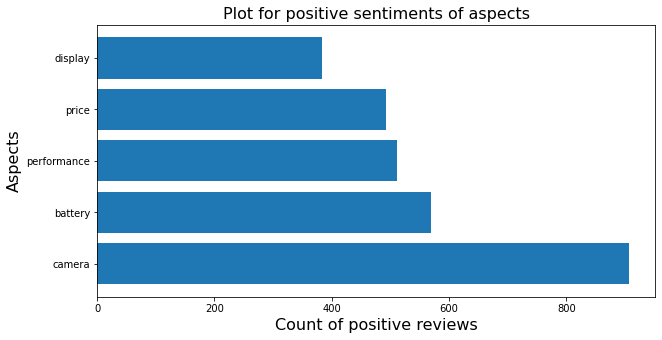

In [83]:
count(pos,"aspects","Plot for positive sentiments of aspects","Count of positive reviews","sentiment")

- Most of the people have a positive view towards the **camera** of our product, followed by _battery, performance, price and display_.
- This helps us in knowing our **strong area**, which we should continue to improve and deliver.

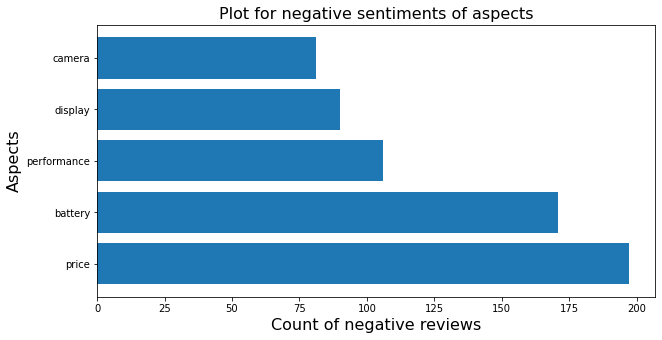

In [84]:
count(neg,"aspects","Plot for negative sentiments of aspects","Count of negative reviews","sentiment")

- Most of the people have complaints about the **price** of our product, also **battery** seems to be an issue as there were many reviews with issues of heating and charge.
- This helps us in knowing our **weak area**, which we should work upon to deliver best results.

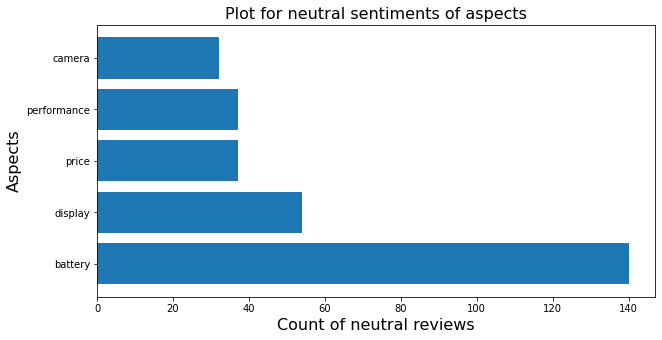

In [85]:
count(neu,"aspects","Plot for neutral sentiments of aspects","Count of neutral reviews","sentiment")

- People are okay and have neutral tone towards the overall performance of **battery** of our product as we see highest occurence of neutral statement for this aspect.


In [86]:
def count_avg(data,group_name,text,text2):
    """
    This function returns the overall sentiment for an aspect by calculating the mean of the column (score)
    
    """
    dict_version = {}
    form_group = data.groupby(by = (group_name))
    for i in list(dict(data['aspects'].value_counts()).keys()):
        get_aspect = form_group.get_group(i)
        result = get_aspect["score"].mean() # calculating the mean of score for a particular aspect
        dict_version[i] = result
    
    plt.figure(figsize=(10, 5))
    x_ver = list(dict_version.keys())
    y_ver = list(dict_version.values())
    plt.barh(x_ver,y_ver,color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel(text2, fontsize = 16)
    plt.ylabel("Aspects", fontsize = 16)
    plt.title(text,fontsize = 16)
    return plt.show() 

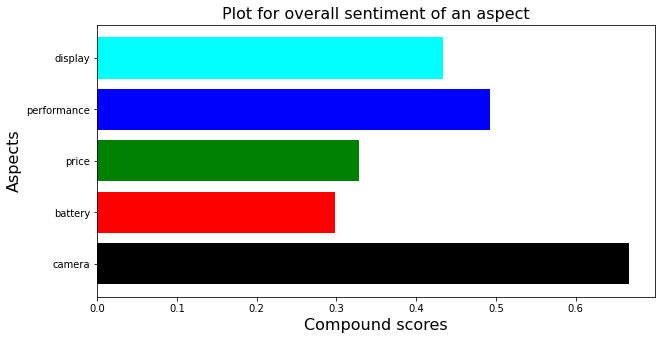

In [87]:
count_avg(iphone_data_bow,'aspects',"Plot for overall sentiment of an aspect","Compound scores")

- We see that most of the people like the **camera, performance and display** of our product. 
- As we see these are the aspects having high overall sentiment score than others, high score ---> good sign for us.

In [88]:
# extra


#pos_review = np.array(count_avg(pos,'aspects'))
#neg_review = np.array(count_avg(neg,'aspects'))
#neu_review = np.array(count_avg(neu,'aspects'))

#average_sentiments = (pos_review + neg_review + neu_review)/3
#plt.figure(figsize=(10, 5))
#x = list(dict(pos["aspects"].value_counts()).keys())
#y = list(average_sentiments)
#plt.barh(x,y,color=['black', 'red', 'green', 'blue', 'cyan'])
#plt.title("Plot for average sentiment of an aspect")
#plt.show() 


# Visualizing results of LDA model:

In [89]:
import pyLDAvis
import pyLDAvis.gensim_models

# Reference--->(https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)

In [90]:
pyLDAvis.enable_notebook()
vis_tfidf = pyLDAvis.gensim_models.prepare(lda_model_bow, bow_corpus, dictionary)
vis_tfidf

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.090124  0.039638       1        1  28.521910
3     -0.058798 -0.044338       2        1  20.896797
2     -0.108226  0.037660       3        1  17.747468
4      0.031559  0.044205       4        1  16.456380
0      0.045341 -0.077163       5        1  16.377446, topic_info=           Term         Freq        Total Category  logprob  loglift
40       charge   736.000000   736.000000  Default  30.0000  30.0000
56      product  1147.000000  1147.000000  Default  29.0000  29.0000
26      battery  1105.000000  1105.000000  Default  28.0000  28.0000
13  performance   428.000000   428.000000  Default  27.0000  27.0000
7        camera  1279.000000  1279.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
6          work    43.030633   364.891557   Topic5  -4.4136  -0.3284
2          love    39.723546   353.833127   Topic5  -4.4935  -0.3776
56      product    49.863080  1147.867025   Topic5  -4.2662  -1.3271
99       amazon    37.817234   425.766127   Topic5  -4.5427  -0.6119
18        money    35.057658   284.327227   Topic5  -4.6185  -0.2839

[237 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
87        1  0.136864  adapt
87        2  0.049769  adapt
87        3  0.012442  adapt
87        4  0.087095  adapt
87        5  0.709206  adapt
...     ...       ...    ...
62        1  0.218238   year
62        2  0.441551   year
62        3  0.101506   year
62        4  0.218238   year
62        5  0.020301   year

[500 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 5, 1])

- Area of each circle here represents the importance of the topic relative to the corpus. As we have five topics, we have five circles.
- _Topic 1 : **battery**, Topic 2 : **camera**, Topic 3 : **price**, Topic 4 : **performance**, Topic 5 : **display**
- Based on area of circle, we see that **battery and camera** are important aspects of our product.
- The distance between the center of the circles indicates the similarity between the topics. Here you can see that the topic 1 and topic 4 are closer, this indicates that these topics are similar in some way. As the **performance** of our product does heavily depends on **battery**.

# Plots for parts of speech:

In [91]:
def pos_tagging(text):
    """
    This function returns a list containing various parts of speech for each word in a given review
    
    """
    pos_=nltk.pos_tag(word_tokenize(text))
    pos_=list(map(list,zip(*pos_)))[1]
    return pos_

#tags = iphone_data_tfidf['review'].apply(lambda x : pos_tagging(x)) # applying the above function to each revoew
#tags = [x for l in tags for x in l] # creating a list of pos for every word in our corpus
#counter = Counter(tags) # this creates a dictionary where key: part of speech, value: count of the occurence of this pos in whole corpus

# Below, we return a list of top (7) elements from most common to least common.
#x,y=list(map(list,zip(*counter.most_common(7))))
#plt.figure(figsize=(14, 7))
#sns.barplot(x=y,y=x)

# Reference---> (https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)

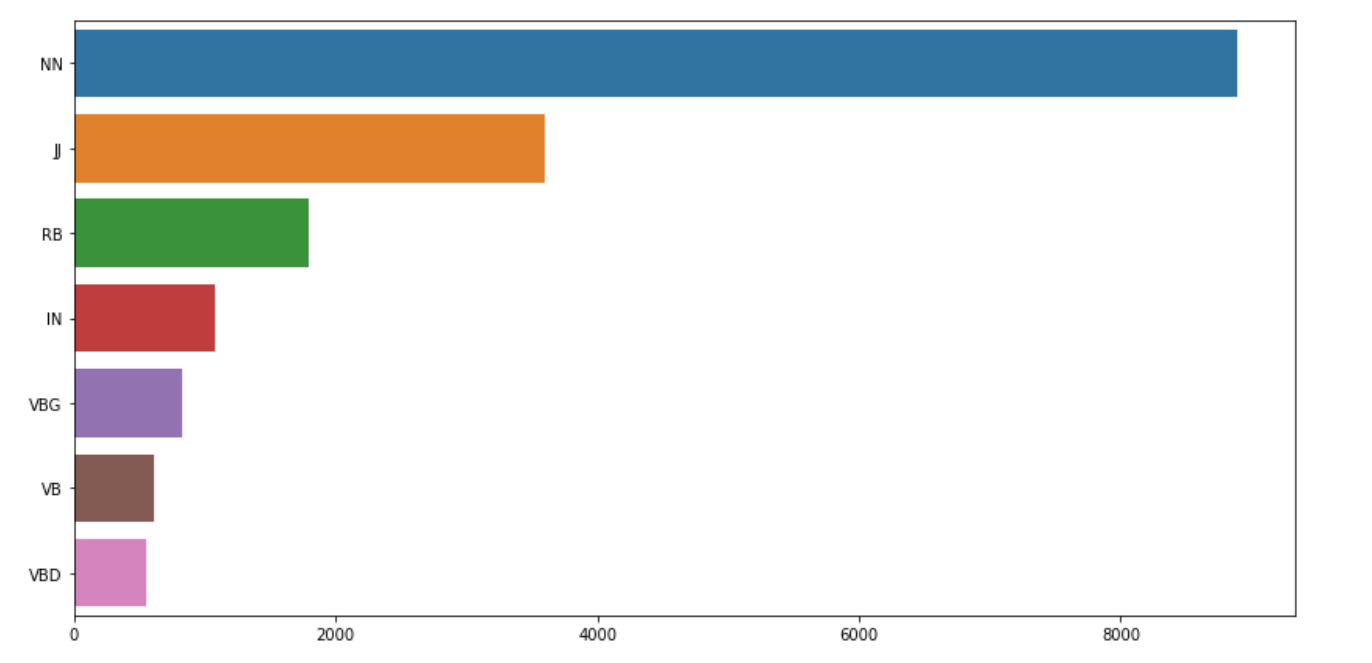

_NN - **NOUN**, JJ - **ADJECTIVE**, RB - **ADVERB**, IN - **PREPOSITION**, VBG - **Verb, gerund or present participle**
VB - **Verb, base form**, VBD - **Verb, past tense**_

----------------------------------------------------------------------------------------------------------------------------------------------------------
- We observe that **nouns** are mostly present in our corpus as the reviews talk about products and their aspects.
- Since, reviews describe the product the second most occuring POS_tag is **adjective**.
- This plot gives us a simple indication that the data scrapped rightfully belongs some product where its features are described.

# Data visualisation: (NMF Model)

# Pie Chart: Aspects

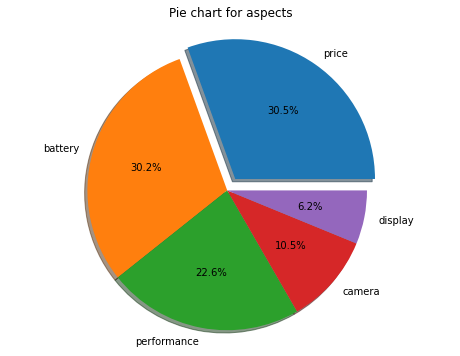

In [92]:
# Code for pie-chart:
x1 = dict(iphone_data_nmf['aspects'].value_counts())
aspect = [] 
for x in x1.keys():
    aspect.append(x)
count_ = [] 
for y in x1.values():
    count_.append(y)
    
labels = aspect
sizes = count_
explode = (0.1,0,0,0,0)  # explode 1st slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Pie chart for aspects')
plt.show()

- As per the **NMF model** the aspect **price** is most talked about followed by _battery, performance, camera, display_.

# Bar Plot: Polarity

In [93]:
pos_nmf = iphone_data_nmf.loc[iphone_data_nmf["sentiment"] == "Positive"]
neg_nmf = iphone_data_nmf.loc[iphone_data_nmf["sentiment"] == "Negative"]
neu_nmf = iphone_data_nmf.loc[iphone_data_nmf["sentiment"] == "Neutral"]

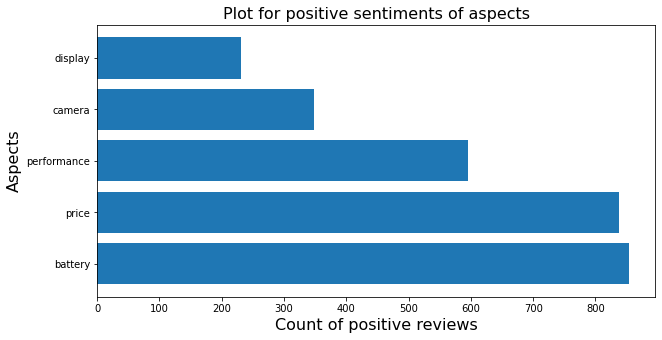

In [94]:
count(pos_nmf,"aspects","Plot for positive sentiments of aspects","Count of positive reviews","sentiment")

- Here we see that the **battery** has the most positive reviews followed by **price**. 
- This seeme in contradiction with what we got in LDA-BOW model. We will later see which Topic modeling technique makes more sense!

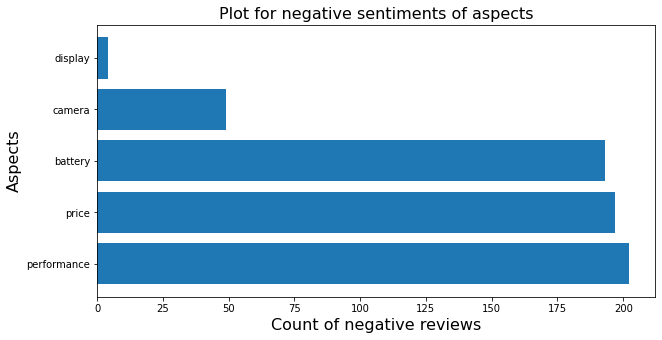

In [95]:
count(neg_nmf,"aspects","Plot for negative sentiments of aspects","Count of negative reviews","sentiment")

- As per NMF model, people are not happy with the overall **performance** of iphone.
- They are satisified with **display and camera** as these have less negative reviews. This lies in line with what we saw in the LDA-BOW model.

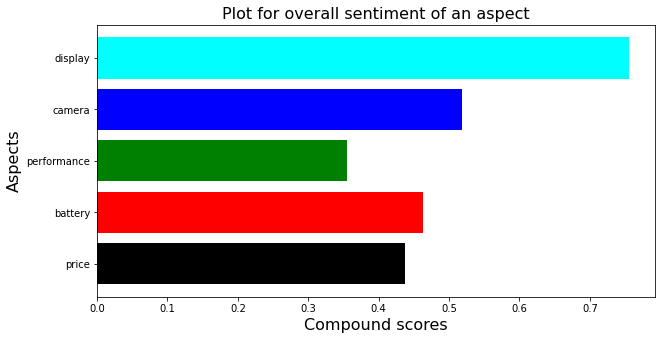

In [96]:
count_avg(iphone_data_nmf,'aspects',"Plot for overall sentiment of an aspect","Compound scores")

- Here too, in **NMF model** we see that the same aspects **camera and display** are liked by people.

In [97]:
# extra


#pos_review_nmf = np.array(count_avg(pos_nmf,'aspects'))
#neg_review_nmf = np.array(count_avg(neg_nmf,'aspects'))

#average_sentiments_nmf = (pos_review_nmf + neg_review_nmf)/2
#plt.figure(figsize=(10, 5))
#x = list(dict(pos["aspects"].value_counts()).keys())
#y = list(average_sentiments_nmf)
#plt.barh(x,y,color=['black', 'red', 'green', 'blue', 'cyan'])
#plt.title("Plot for average sentiment of an aspect")
#plt.show() 


- After doing manual analysis of topics to see which model (LDA_BOW / NMF) gives sensible topic / aspect suggestion.
- It was found that the **LDA_BOW model gave good suggestions** than NMF model as it **captured more and right words** to find the appropriate topic.
- We can get accurare aspects than what we got, if we fine tune the parameters, get more related data. For a simple baseline model, the LDA_BOW for topic modeling does a good job.
- Thus, moving forward we will be using the **LDA_BOW model** for further modeling

# Data Preprocessing:

In [98]:
x = iphone_data_bow.drop(["sentiment","polarity"],axis = 1)
y = iphone_data_bow["sentiment"]

In [99]:
# Splitting the data into: train set, CV set, test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,stratify = y,random_state = 0)

x_trnew,x_cv,y_trnew,y_cv = train_test_split(x_train,y_train,test_size = 0.15,stratify = y_train,random_state = 0)

print('Original train data shape',x_train.shape)
print('='*100)
print('Original test data shape',x_test.shape)
print('='*100)
print('New train shape',x_trnew.shape)
print('='*100)
print('CV shape',x_cv.shape)
print('='*100)

Original train data shape (3237, 10)
Original test data shape (572, 10)
New train shape (2751, 10)
CV shape (486, 10)


# TF-IDF Vectorization:

In [100]:
tfidf1 = TfidfVectorizer(min_df=10,ngram_range=(1,3), max_features=500)

tfidf_review_train_orignal = tfidf1.fit_transform(x_train['review'].values)
tfidf_review_test_orignal = tfidf1.transform(x_test['review'].values)
tfidf_review_train_new = tfidf1.transform(x_trnew['review'].values)
tfidf_review_cv = tfidf1.transform(x_cv['review'].values)

print('After TF-IDF')
print('Original train data shape',tfidf_review_train_orignal.shape)
print('='*100)
print('Original test data shape',tfidf_review_test_orignal.shape)

After TF-IDF
Original train data shape (3237, 500)
Original test data shape (572, 500)


# One Hot Encoding:

In [101]:
ONE = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

aspects_train_orig = ONE.fit_transform(x_train['aspects'].values.reshape(-1,1))
aspects_test_orig = ONE.transform(x_test['aspects'].values.reshape(-1,1))
aspects_train_new = ONE.transform(x_trnew['aspects'].values.reshape(-1,1))
aspects_cv = ONE.transform(x_cv['aspects'].values.reshape(-1,1))

print('Original train data shape',aspects_train_orig.shape)
print('='*100)
print('Original test data shape',aspects_test_orig.shape)


Original train data shape (3237, 5)
Original test data shape (572, 5)


# Normalization:

In [102]:
# score

scaled = MinMaxScaler()
scaled.fit(x_train['score'].values.reshape(-1,1))

score_train_orig = scaled.transform(x_train['score'].values.reshape(-1,1))
score_test_orig = scaled.transform(x_test['score'].values.reshape(-1,1))
score_train_new = scaled.transform(x_trnew['score'].values.reshape(-1,1))
score_cv = scaled.transform(x_cv['score'].values.reshape(-1,1))

print('Original train data shape',score_train_orig.shape)
print('='*100)
print('Original test data shape for number of projects',score_test_orig.shape)

Original train data shape (3237, 1)
Original test data shape for number of projects (572, 1)


In [103]:
# char_count

scaled_a = MinMaxScaler()
scaled_a.fit(x_train['char_count'].values.reshape(-1,1))

char_count_train_orig = scaled_a.transform(x_train['char_count'].values.reshape(-1,1))
char_count_test_orig = scaled_a.transform(x_test['char_count'].values.reshape(-1,1))
char_count_train_new = scaled_a.transform(x_trnew['char_count'].values.reshape(-1,1))
char_count_cv = scaled_a.transform(x_cv['char_count'].values.reshape(-1,1))

print('Original train data shape',char_count_train_orig.shape)
print('='*100)
print('Original test data shape for number of projects',char_count_test_orig.shape)

Original train data shape (3237, 1)
Original test data shape for number of projects (572, 1)


In [104]:
# word_count

scaled_b = MinMaxScaler()
scaled_b.fit(x_train['word_count'].values.reshape(-1,1))

word_count_train_orig = scaled_b.transform(x_train['word_count'].values.reshape(-1,1))
word_count_test_orig = scaled_b.transform(x_test['word_count'].values.reshape(-1,1))
word_count_train_new = scaled_b.transform(x_trnew['word_count'].values.reshape(-1,1))
word_count_cv = scaled_b.transform(x_cv['word_count'].values.reshape(-1,1))

print('Original train data shape',word_count_train_orig.shape)
print('='*100)
print('Original test data shape for number of projects',word_count_test_orig.shape)

Original train data shape (3237, 1)
Original test data shape for number of projects (572, 1)


In [105]:
# unique_word_count

scaled_c = MinMaxScaler()
scaled_c.fit(x_train['unique_word_count'].values.reshape(-1,1))

unique_word_count_train_orig = scaled_c.transform(x_train['unique_word_count'].values.reshape(-1,1))
unique_word_count_test_orig = scaled_c.transform(x_test['unique_word_count'].values.reshape(-1,1))
unique_word_count_train_new = scaled_c.transform(x_trnew['unique_word_count'].values.reshape(-1,1))
unique_word_count_cv = scaled_c.transform(x_cv['unique_word_count'].values.reshape(-1,1))

print('Original train data shape',unique_word_count_train_orig.shape)
print('='*100)
print('Original test data shape for number of projects',unique_word_count_test_orig.shape)

Original train data shape (3237, 1)
Original test data shape for number of projects (572, 1)


In [106]:
# stopword_count

scaled_d = MinMaxScaler()
scaled_d.fit(x_train['stopword_count'].values.reshape(-1,1))

stopword_count_train_orig = scaled_d.transform(x_train['stopword_count'].values.reshape(-1,1))
stopword_count_test_orig = scaled_d.transform(x_test['stopword_count'].values.reshape(-1,1))
stopword_count_train_new = scaled_d.transform(x_trnew['stopword_count'].values.reshape(-1,1))
stopword_count_cv = scaled_d.transform(x_cv['stopword_count'].values.reshape(-1,1))

print('Original train data shape',stopword_count_train_orig.shape)
print('='*100)
print('Original test data shape for number of projects',stopword_count_test_orig.shape)

Original train data shape (3237, 1)
Original test data shape for number of projects (572, 1)


In [107]:
# avg_wordlength

scaled_e = MinMaxScaler()
scaled_e.fit(x_train['avg_wordlength'].values.reshape(-1,1))

avg_wordlength_train_orig = scaled_e.transform(x_train['avg_wordlength'].values.reshape(-1,1))
avg_wordlength_test_orig = scaled_e.transform(x_test['avg_wordlength'].values.reshape(-1,1))
avg_wordlength_train_new = scaled_e.transform(x_trnew['avg_wordlength'].values.reshape(-1,1))
avg_wordlength_cv = scaled_e.transform(x_cv['avg_wordlength'].values.reshape(-1,1))

print('Original train data shape',avg_wordlength_train_orig.shape)
print('='*100)
print('Original test data shape for number of projects',avg_wordlength_test_orig.shape)

Original train data shape (3237, 1)
Original test data shape for number of projects (572, 1)


In [108]:
# unique_vs_words

scaled_f = MinMaxScaler()
scaled_f.fit(x_train['unique_vs_words'].values.reshape(-1,1))

unique_vs_words_train_orig = scaled_f.transform(x_train['unique_vs_words'].values.reshape(-1,1))
unique_vs_words_test_orig = scaled_f.transform(x_test['unique_vs_words'].values.reshape(-1,1))
unique_vs_words_train_new = scaled_f.transform(x_trnew['unique_vs_words'].values.reshape(-1,1))
unique_vs_words_cv = scaled_f.transform(x_cv['unique_vs_words'].values.reshape(-1,1))

print('Original train data shape',unique_vs_words_train_orig.shape)
print('='*100)
print('Original test data shape for number of projects',unique_vs_words_test_orig.shape)

Original train data shape (3237, 1)
Original test data shape for number of projects (572, 1)


In [109]:
# stopwords_vs_words

scaled_g = MinMaxScaler()
scaled_g.fit(x_train['stopwords_vs_words'].values.reshape(-1,1))

stopwords_vs_words_train_orig = scaled_g.transform(x_train['stopwords_vs_words'].values.reshape(-1,1))
stopwords_vs_words_test_orig = scaled_g.transform(x_test['stopwords_vs_words'].values.reshape(-1,1))
stopwords_vs_words_train_new = scaled_g.transform(x_trnew['stopwords_vs_words'].values.reshape(-1,1))
stopwords_vs_words_cv = scaled_g.transform(x_cv['stopwords_vs_words'].values.reshape(-1,1))

print('Original train data shape',stopwords_vs_words_train_orig.shape)
print('='*100)
print('Original test data shape for number of projects',stopwords_vs_words_test_orig.shape)

Original train data shape (3237, 1)
Original test data shape for number of projects (572, 1)


# Concatenation:

In [110]:
X_train = hstack((tfidf_review_train_orignal,aspects_train_orig,char_count_train_orig,word_count_train_orig,unique_word_count_train_orig,stopword_count_train_orig,avg_wordlength_train_orig,unique_vs_words_train_orig)).tocsr()
X_test = hstack((tfidf_review_test_orignal,aspects_test_orig,char_count_test_orig,word_count_test_orig,unique_word_count_test_orig,stopword_count_test_orig,avg_wordlength_test_orig,unique_vs_words_test_orig)).tocsr()
X_trn = hstack((tfidf_review_train_new,aspects_train_new,char_count_train_new,word_count_train_new,unique_word_count_train_new,stopword_count_train_new,avg_wordlength_train_new,unique_vs_words_train_new)).tocsr()
X_cv = hstack((tfidf_review_cv,aspects_cv,char_count_cv,word_count_cv,unique_word_count_cv,stopword_count_cv,avg_wordlength_cv,unique_vs_words_cv,stopwords_vs_words_cv)).tocsr()

# not including the "score" here as we did feature bining on it to get---> (positive,neutral,negative)

In [111]:
print("Final Data matrix")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_trn.shape, y_trnew.shape)
print(X_cv.shape, y_cv.shape)
print("="*100)

Final Data matrix
(3237, 511) (3237,)
(572, 511) (572,)
(2751, 511) (2751,)
(486, 512) (486,)


# Dumping all the necessary files:

In [112]:
#iphone_data_bow.to_csv("Modeling_data_bow.csv")

In [113]:
#with open('X_train', 'wb') as fp:
    #pickle.dump(X_train, fp)

In [114]:
#with open('X_test', 'wb') as fp:
    #pickle.dump(X_test, fp)

In [115]:
#with open('X_trn', 'wb') as fp:
    #pickle.dump(X_trn, fp)

In [116]:
#with open('X_cv', 'wb') as fp:
    #pickle.dump(X_cv, fp)

In [117]:
#df = pd.DataFrame(X_train.toarray())

In [118]:
#df